In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\train.json')
test_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\test.json')
val_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\validation.json')

print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(data):
    text_key = 'Tweet'  
    if text_key not in data[0]:
        raise KeyError(f"'{text_key}' not found in data. Available keys: {list(data[0].keys())}")
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
    print("Encoding successful")
except Exception as e:
    print(f"Error during encoding: {e}")
    raise  

train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Train encodings shape:", train_encodings['input_ids'].shape)
print("Test encodings shape:", test_encodings['input_ids'].shape)
print("Validation encodings shape:", val_encodings['input_ids'].shape)

def create_dataloader(encodings, labels, batch_size=16):
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    dataset = TensorDataset(input_ids, attention_mask, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

try:
    train_dataloader = create_dataloader(train_encodings, train_labels)
    val_dataloader = create_dataloader(val_encodings, val_labels)
    test_dataloader = create_dataloader(test_encodings, test_labels)

    print("Train dataloader size:", len(train_dataloader))
    print("Validation dataloader size:", len(val_dataloader))
    print("Test dataloader size:", len(test_dataloader))
except Exception as e:
    print(f"Error creating dataloaders: {e}")
    print("Shape of train_encodings:", {k: v.shape for k, v in train_encodings.items()})
    print("Shape of train_labels:", train_labels.shape)

Structure of first item in train_data:
{
  "ID": "2017-En-31264",
  "Tweet": "And the weathers so breezy, man why can't life always be this easy?",
  "anger": false,
  "anticipation": false,
  "disgust": false,
  "fear": false,
  "joy": true,
  "love": false,
  "optimism": true,
  "pessimism": false,
  "sadness": false,
  "surprise": true,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Encoding successful
Train labels shape: torch.Size([3000, 11])
Test labels shape: torch.Size([1500, 11])
Validation labels shape: torch.Size([400, 11])
Train encodings shape: torch.Size(

In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW

num_labels = len(all_labels) 

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

optimizer = AdamW(model.parameters(), lr=2e-5)

print(f"Model initialized with {num_labels} output labels")
print(f"Optimizer initialized with learning rate 2e-5")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to {device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model initialized with 11 output labels
Optimizer initialized with learning rate 2e-5
Model moved to cpu


In [ ]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

def load_json_file(filepath, max_samples=None):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    if max_samples:
        return data[:max_samples]
    return data

max_samples = 1000  
train_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\train.json', max_samples)
test_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\test.json', max_samples//5)
val_data = load_json_file(r'C:\Users\V Varunkumar\Desktop\Assignments\Data mining\DM 3\student_31\validation.json', max_samples//5)

print(f"Loaded {len(train_data)} train samples, {len(val_data)} validation samples, {len(test_data)} test samples")

all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']


def convert_labels_to_list(data, label_classes):
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(data):
    text_key = 'Tweet'  
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

train_encodings = encode_texts(train_data)
val_encodings = encode_texts(val_data)
test_encodings = encode_texts(test_data)

train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)

def create_dataloader(encodings, labels, batch_size=16):
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_dataloader = create_dataloader(train_encodings, train_labels)
val_dataloader = create_dataloader(val_encodings, val_labels)
test_dataloader = create_dataloader(test_encodings, test_labels)

num_labels = len(all_labels)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

optimizer = AdamW(model.parameters(), lr=2e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 5  
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    
    for batch in progress_bar:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        progress_bar.set_postfix({'train_loss': f'{loss.item():.4f}'})
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]'):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            total_val_loss += outputs.loss.item()
    
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {avg_train_loss:.4f}')
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print('-' * 50)

print("Training completed!")

# Save the model
torch.save(model.state_dict(), 'bert_multi_label_model.pth')
print("Model saved!")

Loaded 1000 train samples, 200 validation samples, 200 test samples


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 [Val]: 100%|██████████| 13/13 [00:19<00:00,  1.47s/it]


Epoch 1/5:
Train Loss: 0.5203
Validation Loss: 0.4790
--------------------------------------------------


Epoch 2/5 [Val]: 100%|██████████| 13/13 [00:20<00:00,  1.58s/it]


Epoch 2/5:
Train Loss: 0.4375
Validation Loss: 0.4089
--------------------------------------------------


Epoch 3/5 [Val]: 100%|██████████| 13/13 [00:29<00:00,  2.24s/it]


Epoch 3/5:
Train Loss: 0.3696
Validation Loss: 0.3739
--------------------------------------------------


Epoch 4/5 [Val]: 100%|██████████| 13/13 [00:18<00:00,  1.45s/it]


Epoch 4/5:
Train Loss: 0.3291
Validation Loss: 0.3567
--------------------------------------------------


Epoch 5/5 [Val]: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]


Epoch 5/5:
Train Loss: 0.2927
Validation Loss: 0.3551
--------------------------------------------------
Training completed!
Model saved!


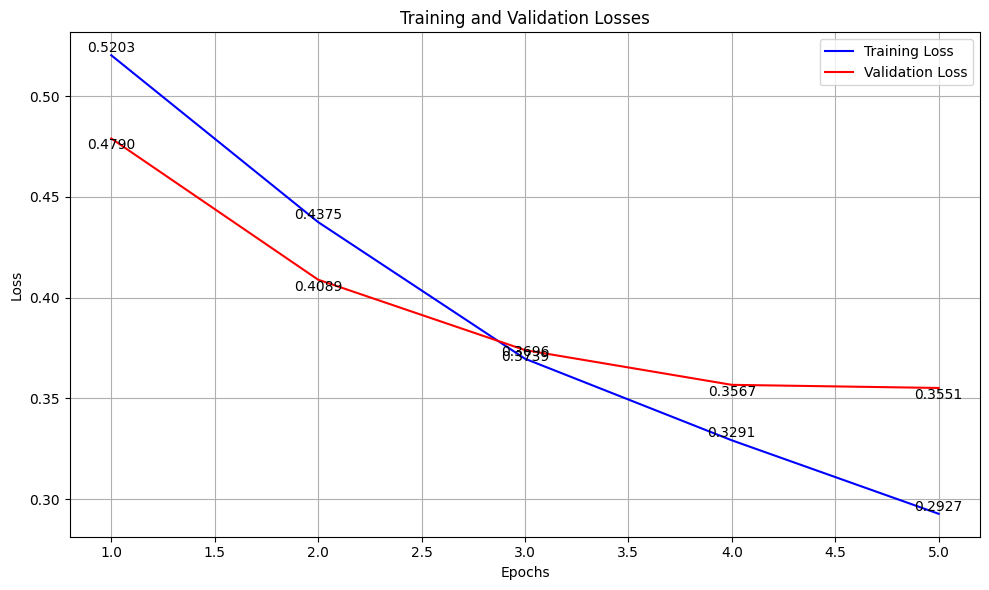

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Add value labels
    for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
        plt.text(i+1, train_loss, f'{train_loss:.4f}', ha='center', va='bottom')
        plt.text(i+1, val_loss, f'{val_loss:.4f}', ha='center', va='top')
    
    plt.tight_layout()
    plt.savefig('learning_curves.png')
    plt.show()

# Plot the learning curves
plot_learning_curves(train_losses, val_losses)